In [195]:
import pandas as pd
import pandas_profiling
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## Load the data

In [210]:
movies = pd.read_pickle(os.environ['DOMINO_WORKING_DIR']+"/data/interim/movies_with_overviews.pkl")
movies = pd.DataFrame(movies)
movies = movies.drop(["backdrop_path","poster_path","video"],axis=1)

genres = pd.read_pickle(os.environ['DOMINO_WORKING_DIR']+"/data/processed/Genredict.pkl")


## Movie Genres 

In [ ]:
print("There are {} genres for out list of Movies".format(len(genres)))
print("The list of genres is: {}".format(genres.values()))

## Sample Movie

In [212]:
movies.sample(1)

,adult,genre_ids,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count
1380,False,"[27, 878, 53]",8843,en,The Cell,A psychotherapist journeys inside a comatose s...,9.721,2000-08-17,The Cell,6.1,758


## Movie Description Word Cloud

There are 529574 words in the combination of all review.


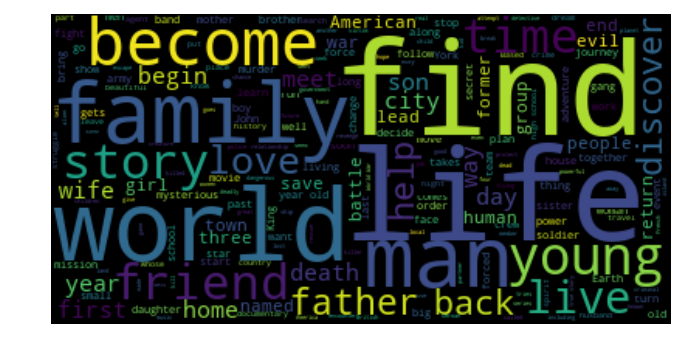

In [213]:
text = " ".join(overview for overview in movies.overview)
print ("There are {} words in the combination of all review.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["one", "two", "set", "must", "come", "take","film", "now","will","new","make"])

wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Histogram of Movies by Release Year

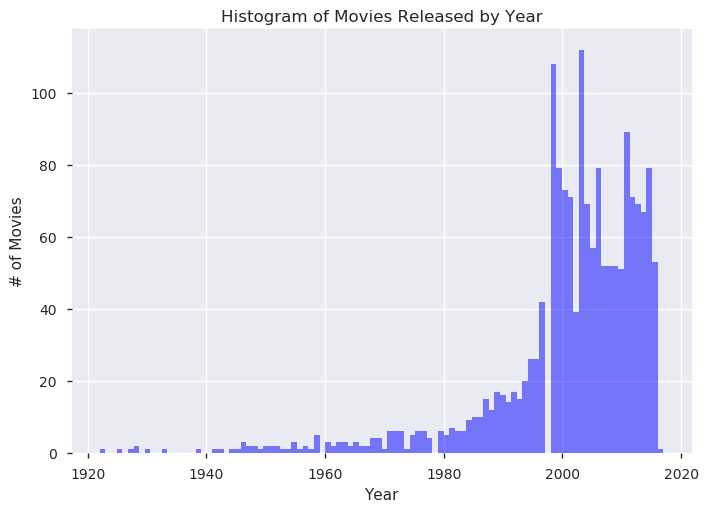

In [214]:
movies['release_date'] = movies['release_date'].astype('datetime64[ns]')
movies["release_date"].dt.year
movies = movies.assign(release_year = movies["release_date"].dt.year )

n, bins, patches = plt.hist(movies['release_year'],bins=100, facecolor='blue', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('# of Movies')
plt.title('Histogram of Movies Released by Year')
plt.show()

## Pandas Profiling of our Movies Data

In [215]:
movies_cols = movies[['release_year','popularity','vote_average','vote_count']]
pandas_profiling.ProfileReport(movies_cols)

Number of variables,4
Number of observations,1711
Total Missing (%),0.0%
Total size in memory,53.5 KiB
Average record size in memory,32.0 B
Numeric,4
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0
